In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FuelConsumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
X = df['CYLINDERS'].values
Y = df['CO2EMISSIONS'].values

In [5]:
X_mean = np.mean(X)
y_mean = np.mean(Y)

In [18]:
numerator = np.sum((X-X_mean) * (Y - y_mean))
denominator = np.sum((X-X_mean) ** 2)

In [19]:
print(numerator)
print(denominator)

103174.08059981256
3444.05060918463


In [10]:
b1 = numerator / denominator
b0 = y_mean - (b1 * X_mean)

In [11]:
print(b0)
print(b1)

82.63419906705181
29.95719061870544


In [12]:
x_max = np.max(X) + 100
x_min = np.min(X) - 100
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

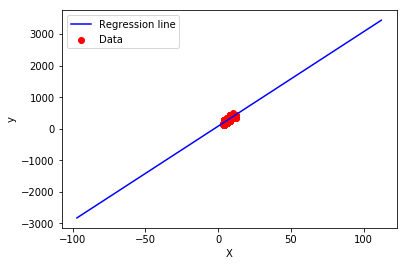

In [13]:
plt.plot(x, y, color = 'blue', label = 'Regression line')
plt.scatter(X, Y, color = 'red', label = 'Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [14]:
#rmse = 0
#for i in range(len(X)):
#    y_pred = b0 + b1 * X[i]
#    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(np.sum((Y - (b0 + b1 * X)) ** 2) / len(X))
#rmse = np.sqrt(rmse/len(X))
print(rmse)

33.40000116447246


In [15]:
#for i in range(len(X)):
#    y_pred = b0 + b1 * X[i]
#    sumofsquares = (Y[i] - y_mean) ** 2
#    sumofresiduals = (Y[i] - y_pred) ** 2
score = 1 - (np.sum((Y - (b0 + b1 * X)) ** 2) / np.sum((Y - y_mean) ** 2))

In [16]:
print(score)

0.721963905906192
